# Liquid/liquid equilibrium : ternary diagram and extraction

The code allow to create the ternary diagram (in weight %) for the isopropyl ether (diluant D), acetic acid (solute A) and water (solvent S). It plots the binodal curve and the tie lines (conodales in French). It is then possible to calculate the extraction for a given mixture  i.e. the composition and the weight of the extract and the rafinate phases. 

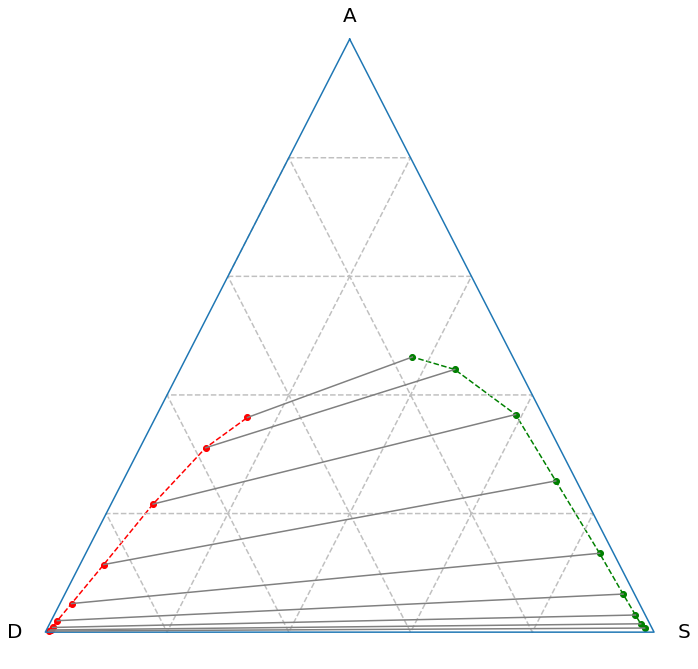

In [71]:
import numpy as np
import matplotlib.pyplot as plt
#S for solvent, A for solute and D for diluant
#SP for solvent phase DP for diluant phase
# Equilibrium data 
xA_SP=np.array([0.69,  1.41,2.89,6.42,13.3,25.5,36.7,44.3,46.4])
xS_SP=np.array([98.1 , 97.1,95.5,91.7,84.4,71.1,58.9,45.1,37.1])
xA_DP=np.array([0.18,  0.37,0.79,1.93,4.82,11.4,21.6,31.1,36.2])
xS_DP=np.array([0.5,0.7,0.8,1,1.9,3.9,6.9,10.8,15.1])

#functions to change the coordinate from x,y plot to a ternary diagram
def tri(xA,xS):
    X=xS+xA/2
    Y=xA*np.sqrt(3)/2
    return X,Y
def detri(X,Y):
    xA=Y*2/np.sqrt(3)
    xS=X-xA/2
    return xA,xS
#calcul of the position of data point in the x,y plot
XSP,YSP=tri(xA_SP,xS_SP)
XDP,YDP=tri(xA_DP,xS_DP)
#plot of ternary diagram
def ter_diag():
    #Coordinates of based line
    xA_line=np.array([100,  0,0,100])
    xS_line=np.array([0,100,0,0])
    #Coordinates of intermediate line
    xA_uline=np.array([80, 80, 0,20,20, 0,80,60,60,0,40,40,0,60])
    xS_uline=np.array([0,  20,20,0 ,80,80, 0,0,40,40,0,60,60,0])
    #plot
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=1)
    fig, ax = plt.subplots(figsize = (12, 12))   
    plt.plot(XSP,YSP,color='green', marker='o', linestyle='dashed')
    plt.plot(XDP,YDP,color='red', marker='o', linestyle='dashed')
    X,Y=tri(xA_uline,xS_uline)
    plt.plot(X,Y,'--', color='silver')
    X,Y=tri(xA_line,xS_line)
    plt.plot(X,Y)
    for i in range(len(xA_SP)):
        X=np.array([XSP[i],XDP[i]])
        Y=np.array([YSP[i],YDP[i]])
        plt.plot(X,Y, color='grey')
    ax.axis("off")
    plt.text(-5, 0, "D", ha="center", va="center", size=20, bbox=bbox_props)
    plt.text(105, 0, "S", ha="center", va="center", size=20, bbox=bbox_props)
    plt.text(50, 90, "A", ha="center", va="center", size=20, bbox=bbox_props)
    return

ter_diag()
plt.show()

One realizes 100 g of a mixture water/acid/ether with 29 g in acid and 40 g in ether. 

**How many phases will be observed ?**


There will be 2 pahses and the mixure is located between the tie lines 6 and 7


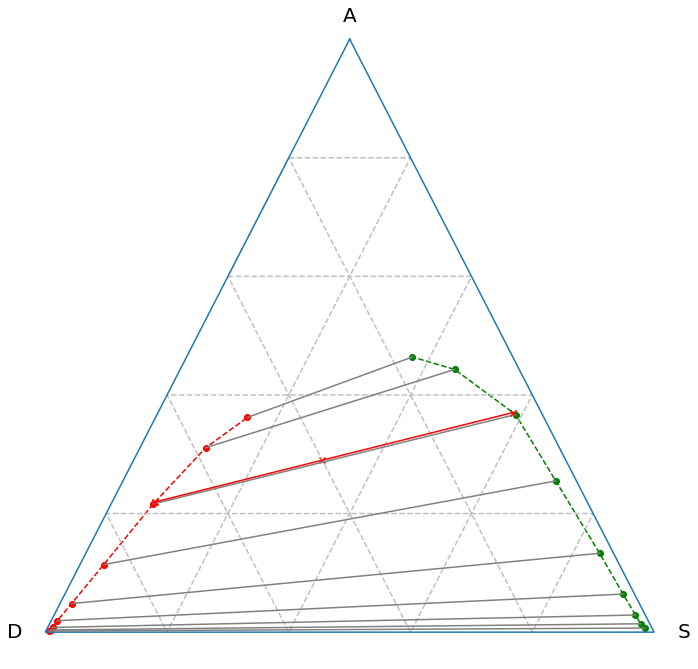

In [72]:
m_M=100
m_A=29
m_D=40
#calculation of mass fraction
m_S=m_M-m_A-m_D
XA_M=100*m_A/m_M
XS_M=100*m_S/m_M
#plot ternary diagram
ter_diag()
#plot the mixture point
X_M,Y_M=tri(XA_M,XS_M)
plt.scatter(X_M,Y_M, color='red', marker='x')
#find the two tie lines bordering the mixture 
c1=0
c2=0
for i in range(len(xA_SP)):
    if Y_M < YDP[i]+(YSP[i]-YDP[i])*(X_M-XDP[i])/(XSP[i]-XDP[i]):
        c1=i-1
        c2=i
        print ('There will be 2 pahses and the mixure is located between the tie lines', c1,'and',c2)
        break
if c2==0 : print ('There is only one phase : the separation is impossible')

#determination of the tie line for the mixture 

#function to find the intersection point between two lines AB and CD
def intersec(xA,yA,xB,yB,xC,yC,xD,yD):
    #slope of line A B
    AB=(yB-yA)/(xB-xA)
    #slope of line A B
    CD=(yD-yC)/(xD-xC)
    x=-(CD*xC-yC-AB*xA+yA)/(AB-CD)
    y=AB*(x-xA)+yA
    return x,y

#find the intersection point I between the two bordering tie line
X_I,Y_I=intersec(XDP[c1],YDP[c1],XSP[c1],YSP[c1],XDP[c2],YDP[c2],XSP[c2],YSP[c2])
#find the intersection point between IM and the binodal curve (diluant side)
X_DC,Y_DC=intersec(X_I,Y_I,X_M,Y_M,XDP[c2],YDP[c2],XDP[c1],YDP[c1])
#find the intersection point between IM and the binodal curve (solvant side)
X_SC,Y_SC=intersec(X_I,Y_I,X_M,Y_M,XSP[c2],YSP[c2],XSP[c1],YSP[c1])
plt.scatter(X_DC,Y_DC, color='red', marker='x')
plt.scatter(X_SC,Y_SC, color='red', marker='x')
plt.plot([X_SC,X_DC],[Y_SC,Y_DC], color='red', marker='x')
plt.show()


>The mixture is below the spinodal curve : there will be two phases. The extraction is then possible by separating the two phases.
    
**Determine the composition of the phases and their weight.**
>The plot of the tie line that pass through the mixture point allow to determine the composition of the two phases.
>The weight of the two phases (the mass of the raffinate rich in diluant, $m_R$ and the mass of the extract rich in solvant, $m_E$) can be determined by a global mass balance and a partial mass balance on the solute :
>$$m_M=m_R+m_E$$
>$$m_M x_{MA} = m_R x_{RA} + m_E x_{EA}$$
It leads to the following relationship for the mass of extract :
>$$m_E=m_M\frac{ x_{MA}-x_{RA}}{x_{EA}-x_{RA}}$$





In [73]:
print ('The composition of the raffinate phase, R, is :')
xA,xS=detri(X_DC,Y_DC)
print ('y_A=', round(xA,2),'% y_S=', round(xS,2),'% y_D=', round(100-xS-xA,2),'%')
print ('The composition of the extract phase, E, is :')
yA,yS=detri(X_SC,Y_SC)
print ('y_A=', round(yA,2),'% y_S=', round(yS,2),'% y_D=', round(100-yS-yA,2),'%')
m_E=m_M*(XA_M-xA)/(yA-xA)
m_R=m_M-m_E
print ('The mass of extract is :', round(m_E,2), 'g and the mass of raffinate is : ', round(m_R,2), 'g ')


The composition of the raffinate phase, R, is :
y_A= 21.96 % y_S= 7.05 % y_D= 71.0 %
The composition of the extract phase, E, is :
y_A= 37.03 % y_S= 58.3 % y_D= 4.67 %
The mass of extract is : 46.73 g and the mass of raffinate is :  53.27 g 


> Now you can play with the code to find the composition of the phases (if any) by changing of m_A and m_D. You should then be able to fell the ternary graphical construction and the link with the mass balance.